<a href="https://colab.research.google.com/github/Bigote93/AnalisisTwitters/blob/main/AnalisisTwitters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Aplicar el llamado de almacenamiento

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
pip install scikit-learn

In [2]:
pip install wordcloud

## Carga de recursos de datos

In [4]:
import pandas as pd

In [5]:
twitters = pd.read_csv('/content/drive/MyDrive/DocumentosModuloIV/AnalisisTwitter/colombian_elections.csv')
twitters.head(5)

,Unnamed: 0,tweet_id,tweetText,polarity_value,polarity_type,topic,set
0,2,ID:142391947707940864,@marodriguezb Gracias MAR,P,AGREEMENT,otros,train
1,3,ID:142416095012339712,"Off pensando en el regalito Sinde, la que se v...",N,AGREEMENT,política,train
2,4,ID:142422495721562112,Conozco a alguien q es adicto al drama! Ja ja ...,P,AGREEMENT,otros,train
3,6,ID:142483342040907776,Toca @crackoviadeTV3 . Grabación dl especial N...,P,AGREEMENT,entretenimiento,train
4,8,ID:142494476051562496,Buen día todos! Lo primero mandar un abrazo gr...,P,AGREEMENT,otros,train


## Modificacion de tipo de dato y columnas de analisis

Seleccionaremos las columnas de sentimientos que analizaremos en este cuaderno.
> Por lo tanto debemos transformar las columnas a nombres en español mas facilmente descriptivos
> Cambiemos los valores de la columna sentimientos a binarios

* tweet_id : IDTwitter
* tweetText: tweetText
* polarity_value: sentimiento
* polarity_type: sentimientoTipo
* topic: asunto
* set: conjunto

In [6]:
#Transformar el nombre de columnas
mapa_columnas = {
    'polarity_value': 'sentimiento',
    'polarity_type': 'sentimientoTipo',
    'topic': 'asunto',
    'set': 'conjunto'
}

#Cambiar nombre de columnas
twitters.rename(columns = mapa_columnas, inplace = True)
twitters.head(5)

,Unnamed: 0,tweet_id,tweetText,sentimiento,sentimientoTipo,asunto,conjunto
0,2,ID:142391947707940864,@marodriguezb Gracias MAR,P,AGREEMENT,otros,train
1,3,ID:142416095012339712,"Off pensando en el regalito Sinde, la que se v...",N,AGREEMENT,política,train
2,4,ID:142422495721562112,Conozco a alguien q es adicto al drama! Ja ja ...,P,AGREEMENT,otros,train
3,6,ID:142483342040907776,Toca @crackoviadeTV3 . Grabación dl especial N...,P,AGREEMENT,entretenimiento,train
4,8,ID:142494476051562496,Buen día todos! Lo primero mandar un abrazo gr...,P,AGREEMENT,otros,train


## Matriz de tokens

Creamos la matriz de ejemplo de tokens por columna

* Creamos un conjunto de datos de ejemplo
* Creamos una instancia de vectorizador
* Cargamos la instancia con el texto de ejemplo
* Creamos la matriz parseada, es decir una matriz que identifique 0 y 1 para verificar si la palabra se encuentra o no en la oracion del dataset "texto"

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

#Crear conjunto de datos

texto = [
    "Las comidas de la semana son bastante buenas",
    "La comida que prepara mi novia es muy buena",
    "El fin de semana nunca comemos comida buena"
]

#Crear vectorizador
vectorizador = CountVectorizer()

#Entrenar vectorizador
bag_of_words = vectorizador.fit_transform(texto)

#Matriz parceada
matriz = pd.DataFrame.sparse.from_spmatrix(
    bag_of_words,
    columns = vectorizador.get_feature_names_out()
)

matriz

,bastante,buena,buenas,comemos,comida,comidas,de,el,es,fin,la,las,mi,muy,novia,nunca,prepara,que,semana,son
0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1
1,0,1,0,0,1,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0
2,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0


## Trabajar los datos del dataset original

* Cargamos el dataset twitters y hacemos el cambio del nombre de las variables de la forma:
> - "N" : 0
> - "P" : 1

* Luego creamos los datos de entrenamiento con el dataset considerando las columnas de texto y sentimiento

In [11]:
from sklearn.model_selection import train_test_split

#Creamos una columna nueva con la asignacion de valores
twitters['Sentimiento_c'] = twitters['sentimiento'].replace(
    ['N','P'],[0,1]
)

#Crear matriz de counvectorizer
vectorizador = CountVectorizer(
    lowercase=True,
    max_features=1000
)

#Cargamos el modelo con los datos
bag_of_words = vectorizador.fit_transform(
    twitters.tweetText
)

#Instanciamos los conjuntos de datos de entrenamiento y test
datos_analisis = train_test_split(
    bag_of_words,
    twitters.Sentimiento_c,
    random_state= 20
)

#Asignamos valores de entrenamiento y test
X_train, X_test, y_train, y_test = datos_analisis


## Instanciamos el modelo regreesion

In [13]:
from sklearn.linear_model import LogisticRegression

#Instanciamos el modelo regression
regression_instance = LogisticRegression()

#Cargamos los datos al modelo de regression
regression_instance.fit(X_train, y_train)

#Creamos el score del modelo realizado utilizando los datos test
accuracy = regression_instance.score(X_test, y_test)
accuracy

0.755327545382794

## Crear nube de palabras

In [14]:
# Palabras del twitters
palabras = ' '.join([words for words in twitters['tweetText']])

palabras

'@marodriguezb Gracias MAR Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento) Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo! Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas! Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana. Desde el escaño. Todo listo para empezar #endiascomohoy en el Congreso http://t.co/Mu2yIgCb Bdías. EM no se ira de puente. Si vosotros os vais no dejeis de llevar la tableta o el PC y desde luego Orbyt. De momento no digo más. Un sistema económico q recorta dinero para prestaciones sociales y refuerza con billón y medio d euros a los bancos, no necesita repensarse? #programascambiados caca d ajuste Buen viernes “@adri_22_22: #programascambiados es TT gracias a @Carlos_Latre” GRACIAS POR EL BUEN RATO AMIGOS!!;) La Universidad confía en De la Calle para encarar su

### (1) Ejemplo simple

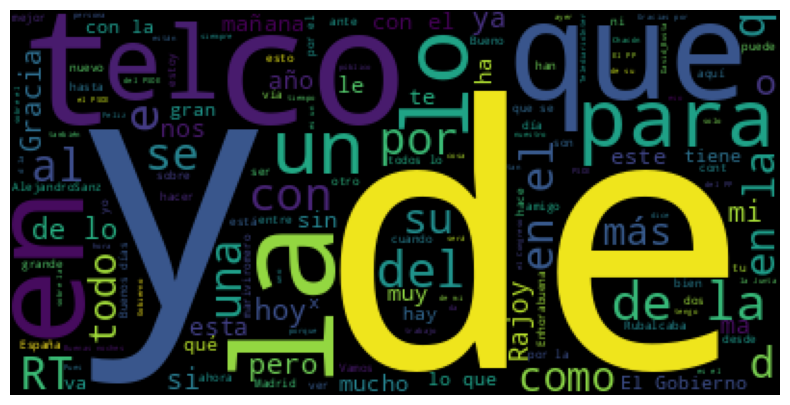

In [15]:
#Cargamos libreria
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#funcion creadora de nube
def plot_cloud(wordcloud_instance):
  plt.figure(figsize=(10,5)) #Tamaño de figura
  plt.imshow(wordcloud_instance) #Carga de instancia para mostrar
  plt.axis('off') #Eliminacion de ejes de imagen

#Creacion instancia de nube con el texto
wordCloud_tweet = WordCloud().generate(palabras)

#Creacion de nube
plot_cloud(wordCloud_tweet)

### (2) Ejemplo especificado

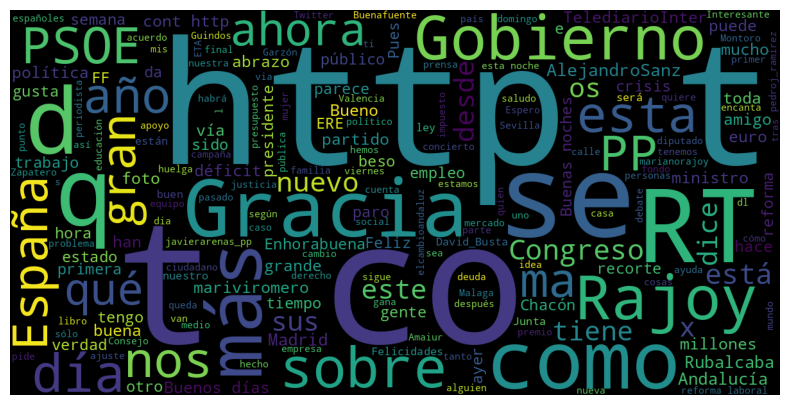

In [20]:
#Stopword en español
stopwords_es = [
    "a", "al", "algo", "allá", "ambos", "algún", "alguna", "algunos", "algunas", "ante", "antes", "apenas", "aquello", "aquella", "aquellos", "aquellas", "aquel", "aquí", "arriba", "as", "aún", "bajo", "bastante", "bien", "cada", "callar", "casi", "cerca", "cierto", "claro", "comer", "con", "contra", "cosa", "creo", "cual", "cualquier", "cuando", "cuanto", "de", "debe", "deber", "decir", "del", "demás", "dentro", "donde", "dos", "durante", "el", "ella", "ellos", "en", "encima", "entonces", "entre", "era", "es", "esas", "ese", "eso", "estos", "estar", "etcétera", "estar", "esto", "estoy", "estuvo", "etcétera", "exagerar", "falso", "fecha", "fin", "fue", "fue", "hacer", "ha", "hay", "hasta", "he", "her", "hola", "hoy", "i", "igual", "incluso", "imaginar", "impedir", "importante", "inmediatamente", "ir", "junto", "la", "las", "le", "leer", "les", "llegar", "lo", "los", "luego", "mal", "mañana", "me", "mejor", "menos", "mi", "mí", "mismo", "momento", "muchos", "muchas", "muy", "nadie", "nada", "necesario", "necesito", "ni", "nunca", "o", "obviamente", "ofrecer", "ojalá", "oír", "oscuro", "otra", "otros", "otras", "oí", "pagar", "palabra", "para", "parecer", "partir", "pedir", "pensar", "perder", "pero", "persona", "poco", "poder", "por", "porque", "primero", "pronto", "que", "quiero", "quién", "saber", "salir", "ser", "sería", "si", "sí", "siempre", "sin", "solamente", "solo", "son", "soy", "su", "sucede", "también", "tampoco", "tan", "te", "te", "tener", "tenía", "todo", "todos", "tomar", "traer", "tu", "tus", "tuyo", "un", "una", "unos", "unas", "usted", "ustedes", "va", "valer", "vamos", "ver", "vez", "viajar", "vida", "vivir", "voy", "y", "ya", "yo", "usted"
]

stopwords_en = [
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "by", "can", "cannot", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "her", "here", "hers", "herself", "him", "his", "himself", "how", "i", "if", "in", "into", "is", "it", "its", "itself", "just", "ll", "may", "me", "might", "mine", "more", "most", "must", "my", "myself", "no", "nor", "not", "of", "off", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "should", "so", "some", "such", "than", "that", "the", "their", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "upon", "us", "ve", "was", "we", "were", "what", "when", "where", "which", "while", "who", "whom", "whose", "why", "will", "with", "would", "you", "your", "yours", "yourself", "yourself"
]

stopwords_list = stopwords_es + stopwords_en

#Creacion instancia de nube con el texto
wordCloud_tweet2 = WordCloud(
    stopwords=stopwords_list,
    random_state=200,
    height=600,
    width=1200

).generate(palabras)

#Creacion de nube
plot_cloud(wordCloud_tweet2)